<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Ajuste Fino con el modelo BERT.

##   <span style="color:#4361EE">Combinando características categóricas y continuas con textos</span>


<figure>
<center>
<img src="../Imagenes/dress_store.jpeg" width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center"></p>
</figcaption>
</figure>

Fuente: Alvaro Montenegro. Creada con [Stable Diffusion en Huggingface](https://huggingface.co/spaces/stabilityai/stable-diffusion)

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span>

1. [A. Montenegro, D. Montenegro, C. Pardo, O. Jarma: Diplomado Avanzado en Inteligencia Arifical y Aprendizaje Profundo, 2022](https://github.com/AprendizajeProfundo/Diplomado-Avanzado)
1. [A. Montenegro y D.  Montenegro, Minicurso PLN, 2022](https://github.com/AprendizajeProfundo/PLN)
1. [James Briggs, How to Train BERT, Towards Data Science](https://towardsdatascience.com/how-to-train-bert-aaad00533168)
1. [Tutoriales de HuggingFace, Fine-tune a pretrained model](https://huggingface.co/docs/transformers/training),
1. [Combining Categorical and Numerical Features with Text in BERT](https://mccormickml.com/2021/06/29/combining-categorical-numerical-features-with-bert/)
1. [A. Vaswani et al.,   Attention Is All You Need, 2012](https://arxiv.org/pdf/1706.03762.pdf).
1. [D.Rothman, Transformers for Natural Language processing, 2021](http://libgen.rs/search.php?req=Transformers+for+Natural+Language+processing&open=0&res=25&view=simple&phrase=1&column=def).
1.[ Varios,  Dive into deep learning, 2021](https://d2l.ai/)

## <span style="color:#4361EE">Contenido</span>

* [Introducción](#Introducción)
* [Obtener Datos](#Obtener-Datos)
* [AED (Análisis Exploratorio de Datos)](#AED-(Análisis-Exploratorio-de-Datos))
* [Preparar Datos](#Preparar-Datos)
* [Estrategias de Línea Base](#Estrategias-de-Línea-Base)
    * [XG-Boost](#XG-Boost)
    * [BERT](#BERT)
* [BERT con todos los Features](#BERT-con-todos-los-Features)
* [Configurando Pytorch](#Configurando-Pytorch)
* [Tokenizar y hacer los Encodings](#Tokenizar-y-hacer-los-Encodings)
* [Crear Datasets y DataLoaders](#Crear-Datasets-y-DataLoaders)
* [Training](#Training)
* [Resultados](#Resultados)
* [Test](#Test)
* [Conclusión](#Conclusión)

## <span style="color:#4361EE">Introducción</span>

En esta lección, veremos el tema de la clasificación de texto con BERT, pero donde también tenemos características numéricas o categóricas adicionales que queremos usar para mejorar nuestras predicciones.

Para ayudar a motivar nuestra discusión, trabajaremos con un conjunto de datos de aproximadamente 23k reseñas de ropa. Para cada revisión, tenemos el texto de la revisión, pero también información adicional como:

- La edad del revisor (característica numérica)
- El número de votos a favor en la revisión (característica numérica)
- El departamento y la categoría de la prenda (características categóricas)

Para cada reseña, también tenemos una etiqueta binaria, que indica si el revisor finalmente recomienda o no el artículo. Esto es lo que estamos tratando de predecir.

El conjunto de datos a usar es el [Women's E-Commerce Clothing Reviews](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews), disponible en Kaggle.

Sus nueve características de apoyo ofrecen un excelente entorno para analizar el texto a través de sus múltiples dimensiones.

Debido a que se trata de datos comerciales reales, se anonimizaron y las referencias a la empresa en el texto y el cuerpo de la reseña se reemplazaron por "minorista".

En [Multimodal-Toolkit](https://github.com/georgian-io/Multimodal-Toolkit), se muestra que esta estrategia simple de features a texto funciona mejor para este conjunto de datos.

[[Volver]](#Contenido)

## <span style="color:#4361EE">Obtener Datos</span>

In [1]:
!pip install --quiet gdown

In [2]:
import gdown

In [3]:
print('Descargando dataset...\n')

# Download the file.
gdown.download('https://drive.google.com/uc?id=1ZYdt0zN4LjWqP3cQDblNhXjeohcryY5H',
                'Womens Clothing E-Commerce Reviews.csv',
                quiet=False)

print('\n\nHecho.')

Descargando dataset...



Downloading...
From: https://drive.google.com/uc?id=1ZYdt0zN4LjWqP3cQDblNhXjeohcryY5H
To: /content/Womens Clothing E-Commerce Reviews.csv
100%|██████████| 8.48M/8.48M [00:01<00:00, 7.35MB/s]



Hecho.


Hagamos una pequeña exploración de los datos

[[Volver]](#Contenido)

## <span style="color:#4361EE">AED (Análisis Exploratorio de Datos)</span>

In [4]:
import pandas as pd

data_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

data_df.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23276,1020,55,Love this skirt,I read all the reviews and they were very help...,5,1,1,General,Bottoms,Skirts
4204,860,47,Beautiful flowy top,This top is even better than pictured. the col...,5,1,2,General Petite,Tops,Knits
15767,1078,34,Love this dress!,This is my favorite kind of dress: comfortable...,5,1,0,General,Dresses,Dresses
2957,1001,54,NaN,Pros. 1) the color and texture of this skirt a...,4,1,1,General,Bottoms,Skirts
4468,107,30,Gorgeous,Bought this dress as a winter dress. it looks ...,5,1,1,Initmates,Intimate,Sleep


**Features:**

*Recommended IND* es la etiqueta que intentamos predecir para este conjunto de datos. “1” significa que el revisor recomendó el producto y “0” significa que no.

Los siguientes features son categóricos:

- Division Name
- Department Name
- Class Name
- Clothing ID

Y los siguientes features son numéricos:

- Age
- Rating
- Positive Feedback Count


Podemos calcular la cantidad de datos faltantes por feature:

In [5]:
# Datos Faltantes
data_df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Limpiemos un poco los datos:

In [6]:
def preprocess(ReviewText):
    # Quitar algunas etiquetas HTML
    ReviewText = ReviewText.str.replace("(<br/>)", "",regex=True)
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '',regex=True)
    # Errores de Parsing
    ReviewText = ReviewText.str.replace('(&amp)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&gt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(&lt)', '',regex=True)
    ReviewText = ReviewText.str.replace('(\xa0)', ' ',regex=True)
    return ReviewText

# Convertir todos los campos de reviews a texto
data_df['Review Text'] = data_df['Review Text'].astype(str)
#Limpieza inicial de textos
data_df['Review Text'] = preprocess(data_df['Review Text'])

Usaremos TextBlob para calcular la polaridad del sentimiento que se encuentra en el rango de [-1,1] donde 1 significa sentimiento positivo y -1 significa sentimiento negativo.

Además, contemos algunas características importantes: *longitud del Review* y *Cantidad de Palabras*.

In [7]:
!pip install --quiet textblob

In [8]:
from textblob import TextBlob
# Polaridad de los reviews
data_df['Polarity'] = data_df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Número de Palabras
data_df['word_count'] = data_df['Review Text'].str.split().str.len()
# Longitud de Review
data_df['review_len'] = data_df['Review Text'].str.len()

In [9]:
data_df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,word_count,review_len
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,28,131
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,38,223
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,42,208
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,86,427


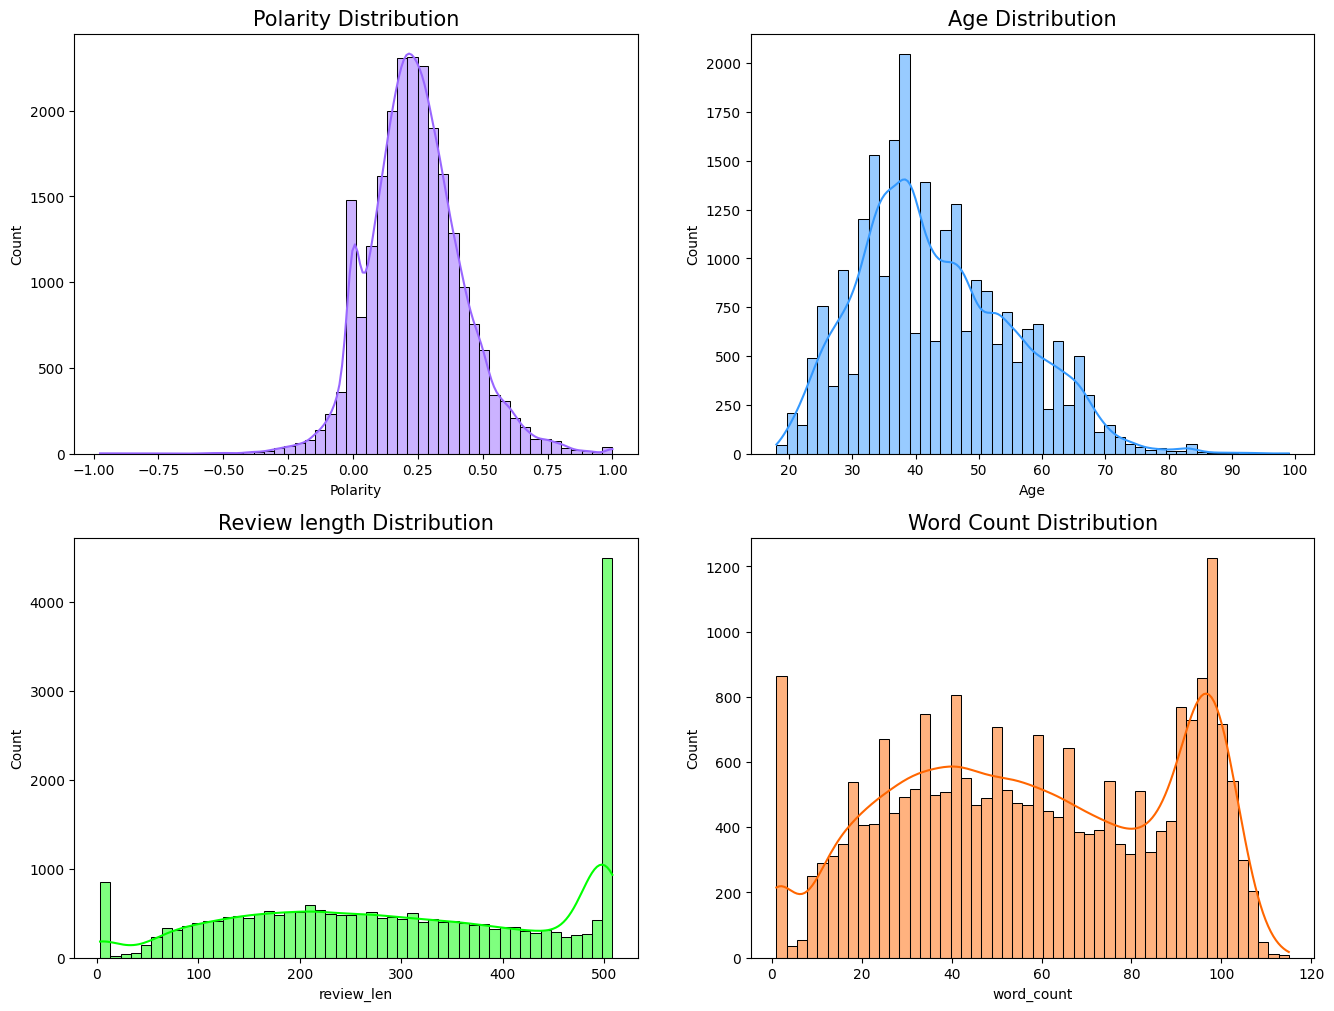

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Polarity','Age', 'review_len', 'word_count']
titles = ['Polarity Distribution','Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

plt.figure(figsize=(16,12))

for i,feature, title, color in zip(range(1,len(features)+1),features, titles, colors):
    plt.subplot(2, 2, i)
    sns.histplot(x=data_df[feature], bins=50, color=color,kde=True)
    plt.title(title, size=15)
    plt.xlabel(feature)
plt.show()

1. La gran mayoría de los puntajes de polaridad de sentimiento son mayores que cero, lo que significa que la mayoría de ellos son bastante positivos.
2. La mayoría de los revisores tienen entre 30 y 40 años.

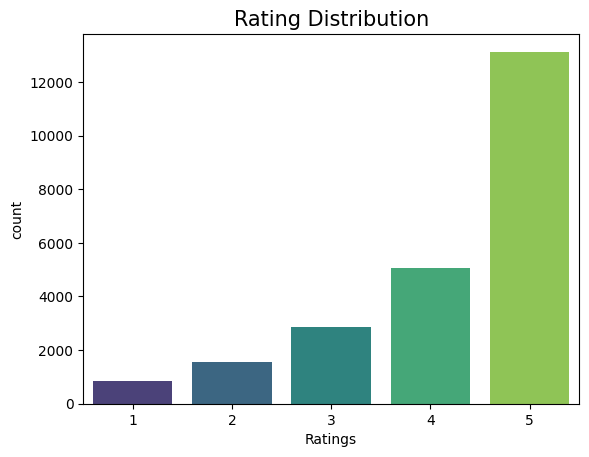

In [11]:
sns.countplot(x = 'Rating', palette='viridis', data=data_df)
plt.title('Rating Distribution', size=15)
plt.xlabel('Ratings')
plt.show()

Las calificaciones están alineadas con el puntaje de polaridad, es decir, la mayoría de las calificaciones son bastante altas ranqueadas entre 4 y 5.

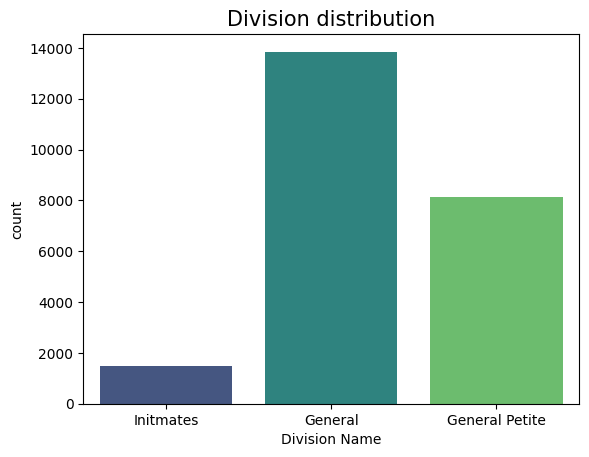

In [12]:
sns.countplot(x='Division Name', palette='viridis', data=data_df)
plt.title('Division distribution', size=15)
plt.show()

La división general tiene la mayor cantidad de reviews y la división Initmates tiene la menor cantidad de revisiones.

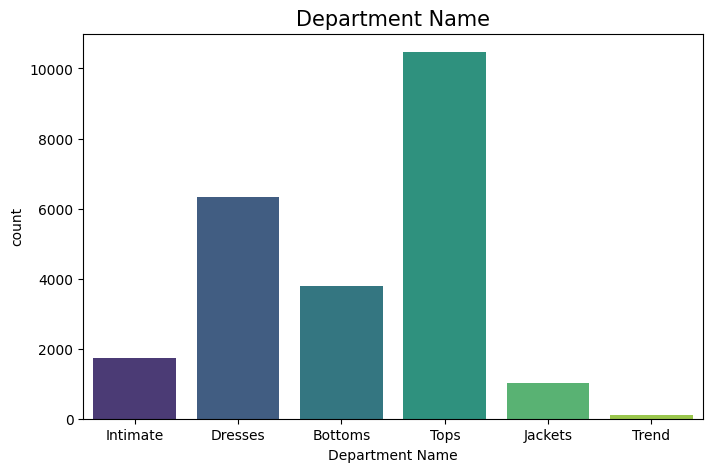

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department Name', palette='viridis', data=data_df)
plt.title('Department Name', size=15)
plt.show()

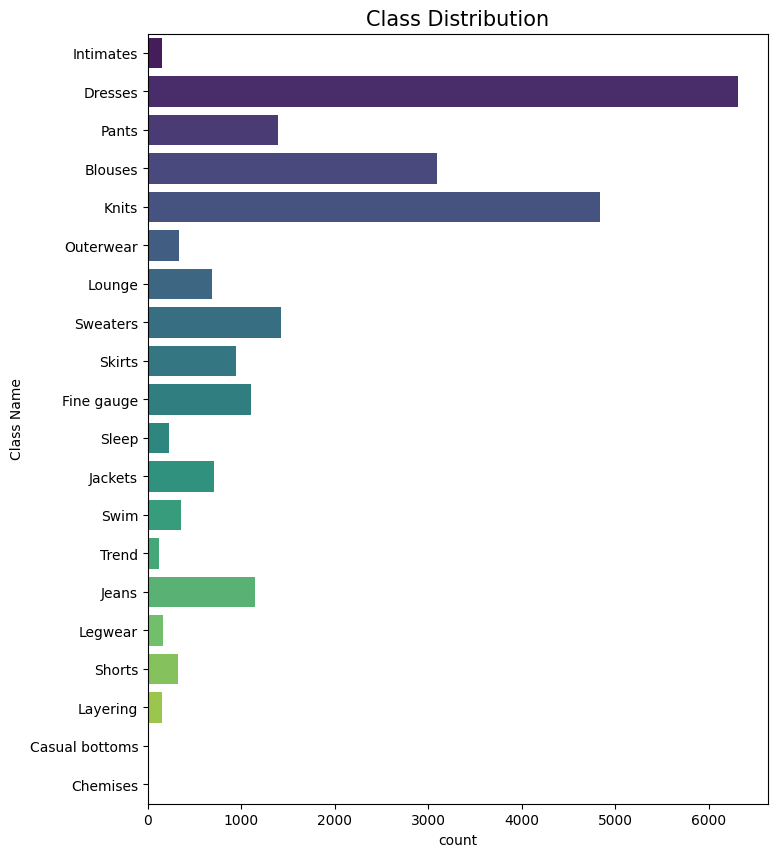

In [14]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='viridis', data=data_df)
plt.title('Class Distribution', size=15)
plt.show()

Usemos las mismas divisiones de entrenamiento, validación y prueba para todos los enfoques que probamos para que sea una comparación justa.

Sin embargo, los diferentes enfoques requerirán diferentes transformaciones en los datos y, para simplificar,
apliquemos esas transformaciones antes de dividir el conjunto de datos.

Para solucionar esto, vamos a crear listas de índices para cada una de las tres porciones. De esa manera, para un enfoque de clasificación dado, podemos cargar todo el conjunto de datos, aplicar nuestras transformaciones y luego dividirlo de acuerdo con estos índices predeterminados.

In [15]:
import random
import numpy as np

# First, calculate the split sizes. 80% training, 10% validation, 10% test.
train_size = int(0.8 * len(data_df))
val_size = int(0.1 * len(data_df))
test_size = len(data_df) - (train_size + val_size)

# Sanity check the sizes.
assert((train_size + val_size + test_size) == len(data_df))

# Create a list of indexes for all of the samples in the dataset.
indexes = np.arange(0, len(data_df))

# Shuffle the indexes randomly.
random.shuffle(indexes)

# Get a list of indexes for each of the splits.
train_idx = indexes[0:train_size]
val_idx = indexes[train_size:(train_size + val_size)]
test_idx = indexes[(train_size + val_size):]

# Sanity check
assert(len(train_idx) == train_size)
assert(len(test_idx) == test_size)

# With these lists, we can now select the corresponding dataframe rows using,
# e.g., train_df = data_df.iloc[train_idx]

print('  Training size: {:,}'.format(train_size))
print('Validation size: {:,}'.format(val_size))
print('      Test size: {:,}'.format(test_size))

  Training size: 18,788
Validation size: 2,348
      Test size: 2,350


## <span style="color:#4361EE">Estrategias de Línea Base</span>

Los siguientes son algunos enfoques alternativos para clasificar este conjunto de datos, ninguno de los cuales usa todas las características juntas.

¿Será posible que BERT supere éstas líneas base?

Este conjunto de datos está muy desequilibrado, con algo así como el 85% de las revisiones que recomiendan el producto.

Si solo predecimos "recomendar" para cada muestra de prueba, ¿cómo lo haríamos?

In [16]:
from sklearn.metrics import f1_score

# Select the test set samples.
test_df = data_df.iloc[test_idx]

# Create a list of all 1s to use as our predictions.
predictions = [1]*len(test_df)

# Calculate the F1 score.
f1 = f1_score(y_true=test_df["Recommended IND"], y_pred=predictions)

print('Si siempre recomendamos el producto...')
print('\nF1: %.3f' % f1)

Si siempre recomendamos el producto...

F1: 0.904


Como se mencionó anteriormente, la "Calificación" es un indicador muy fuerte de si el revisor recomendó el producto o no.

El umbral ideal es una calificación de 3 para recomendar. Veamos ue ocurre con el estadístico F1 en ese caso.


In [17]:
from sklearn.metrics import f1_score

# Predict whether it's recommended based on whether the rating was 3 or higher.
predictions = test_df["Rating"] >= 3

# Calculate the F1 score.
f1 = f1_score(y_true=test_df["Recommended IND"], y_pred=predictions)

print('Recomendar si Rating >= 3...')
print('\nF1: %.3f' % f1)

Recomendar si Rating >= 3...

F1: 0.955


### <span style="color:#4361EE">Preparar Datos</span>

Tendremos que codificar todas nuestras características categóricas asignando un valor entero a cada categoría posible y reemplazando las versiones de cadena con estos enteros.

El siguiente código/enfoque proviene de [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html).

In [18]:
# First, change the type of the specified columns to "category". This will
# assign a "code" to each unique category value.
data_df["Clothing ID"] = data_df["Clothing ID"].astype('category')
data_df["Division Name"] = data_df["Division Name"].astype('category')
data_df["Department Name"] = data_df["Department Name"].astype('category')
data_df["Class Name"] = data_df["Class Name"].astype('category')

# Second, replace the strings with their code values.
data_df["Clothing ID"] = data_df["Clothing ID"].cat.codes
data_df["Division Name"] = data_df["Division Name"].cat.codes
data_df["Department Name"] = data_df["Department Name"].cat.codes
data_df["Class Name"] = data_df["Class Name"].cat.codes

# Display the table--notice how the above columns are all integers now.
data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,word_count,review_len
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,2,2,5,0.633333,8,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,0,1,3,0.339583,62,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,0,1,3,0.073675,98,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,1,0,13,0.550000,22,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,0,4,0,0.512891,36,192


Para aclararle a XGBoost qué características son categóricas y numéricas, convertimos todas las características numéricas en flotantes.

Se pudo haber hecho esto de otra forma, pero parece que funciona bien como lo hicimos.


In [19]:
# Cast the numerical features to floats.
data_df["Age"] = data_df["Age"].astype('float')
data_df["Rating"] = data_df["Rating"].astype('float')
data_df["Positive Feedback Count"] = data_df["Positive Feedback Count"].astype('float')

data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,word_count,review_len
0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1,0.0,2,2,5,0.633333,8,53
1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1,4.0,0,1,3,0.339583,62,303
2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0,0.0,0,1,3,0.073675,98,500
3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1,0.0,1,0,13,0.550000,22,124
4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1,6.0,0,4,0,0.512891,36,192


In [20]:
# Retrieve the labels for each of the splits.
y_train = data_df["Recommended IND"].iloc[train_idx]
y_val = data_df["Recommended IND"].iloc[val_idx]
y_test = data_df["Recommended IND"].iloc[test_idx]

# Before selecting the inputs, remove text columns and the labels.
data_df = data_df.drop(columns=["Title", "Review Text", "Recommended IND","Polarity","word_count","review_len"])

# Select the inputs for the different splits.
X_train = data_df.iloc[train_idx]
X_val = data_df.iloc[val_idx]
X_test = data_df.iloc[test_idx]

X_train.head()

,Clothing ID,Age,Rating,Positive Feedback Count,Division Name,Department Name,Class Name
22268,867,39.0,5.0,2.0,1,4,8
20087,824,26.0,2.0,1.0,0,4,0
15926,1030,25.0,5.0,0.0,0,0,7
100,861,39.0,4.0,0.0,1,4,8
33,949,36.0,2.0,0.0,0,4,17


### <span style="color:#4361EE">XG-Boost</span>

Cuando se trata de tipos de datos mixtos como este, los árboles de decisión son la solución estándar, siendo los "árboles de decisión potenciados por gradiente" (XGBoost) el modelo más común.

En un árbol de decisión, la decisión de clasificación se divide en muchas decisiones más pequeñas (en cada nodo del árbol). Cada una de estas decisiones más pequeñas puede operar en un tipo de datos diferente, lo que permite una combinación de tipos de datos en el clasificador.

Sin embargo, un árbol de decisión no puede aceptar texto sin formato. Entonces, usemos un árbol de decisiones para hacer nuestras predicciones basadas solo en las características que no son de texto en este conjunto de datos.

Para iniciar con XG-Boost, recomendamos [How to Develop Your First XGBoost Model in Python](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/).

In [21]:
!pip install --quiet xgboost

In [22]:
from xgboost import XGBClassifier

# Create an instance of the classifier
model = XGBClassifier()

# Train it on the training set.
model.fit(X_train, y_train)

# Use the trained model to predict the labels for the test set.
predictions = model.predict(X_test)

# Calculate the F1 score.
f1 = f1_score(y_true = y_test,
              y_pred = predictions)

print('Usando XGBoost en features no-textuales...')
print('\nF1: %.3f' % f1)

Usando XGBoost en features no-textuales...

F1: 0.963


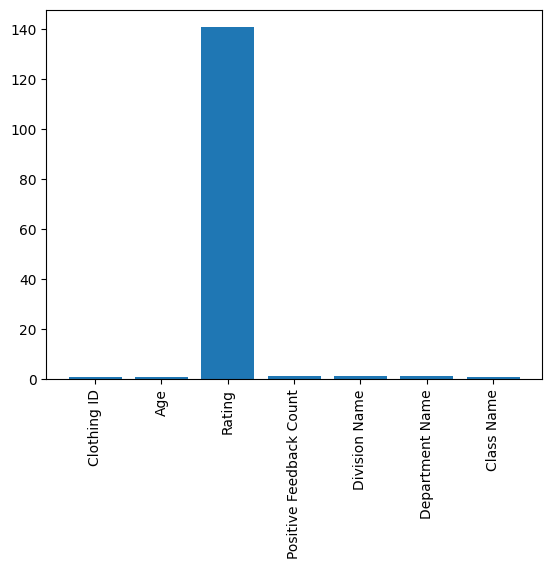

In [23]:
from xgboost import plot_importance
from matplotlib import pyplot

feat_gains = model.get_booster().get_score(importance_type="gain")

pyplot.bar(feat_gains.keys(), feat_gains.values())
pyplot.xticks(rotation = 90);

Observemos que el modelo le da mucho peso al "Rating", pero esto sugiere que las otras características no son particularmente útiles.

Otro enfoque para este análisis sería simplemente descartar características individuales para ver cuánto afecta cada una a la precisión.

[[Volver]](#Contenido)

### <span style="color:#4361EE">BERT</span>

Para nuestra línea de base final, podemos intentar aplicar BERT **solo al texto** de revisión e ignorar todas las demás funciones.

Para ejecutar este experimento, puede modificar la Sección 3.1. para usar simplemente el texto de revisión.

**Ejercicio: Utilice BERT para el proceso de clasificación utilizando el Trainer de HuggingFace.**

**Pista: La métrica F1 debe estar cerca a 0,945.**

Esa es una buena puntuación, pero claramente lo haríamos mejor si pudiéramos incorporar las características que no son de texto.

[[Volver]](#Contenido)

### <span style="color:#4361EE">BERT con todos los Features</span>

¡La forma más sencilla de manejar estas características que no son de texto es convertirlas en texto y concatenarlas con el texto de revisión!

Tiene sentido pensar que BERT hará un mejor trabajo usando las revisiones en un contexto adicional...

Por ejemplo, para manejar el feature "Age", en lugar de simplemente anteponer el número "33", antepongamos el texto "I am 33 years old."

In [24]:
# This will hold all of the dataset samples, as strings.
sen_w_feats = []

# The labels for the samples.
labels = []

# First, reload the dataset to ignore the transformations we applied for XGBoost.
data_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

# Some of the reviews are missing either a "Title" or "Review Text", so we'll
# replace the NaN values with empty string.
data_df = data_df.fillna("")

In [27]:
print('Combinando Features en los textos...')

# For each of the samples...
for index, row in data_df.iterrows():
    # Piece it together...
    combined = ""
    #combined += "The ID of this item is {:}, ".format(row["Clothing ID"])
    combined += "This item comes from the {:} department and {:} division, " \
                "and is classified under {:}. ".format(row["Department Name"],
                                                       row["Division Name"],
                                                       row["Class Name"])
    combined += "I am {:} years old. ".format(row["Age"])
    combined += "I rate this item {:} out of 5 stars. ".format(row["Rating"])
    # Not all samples have titles.
    if not row["Title"] == "":
        combined += row["Title"] + ". "
    # Finally, append the review the text!
    combined += row["Review Text"]
    # Add the combined text to the list.
    sen_w_feats.append(combined)
    # Also record the sample's label.
    labels.append(row["Recommended IND"])

print('Terminado.')
print('Dataset contains {:,} samples.'.format(len(sen_w_feats)))

Combinando Features en los textos...
Terminado.
Dataset contains 23,486 samples.


Veamos cómo queda uno de los ejemplos modificados:

In [28]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80)

i=1234
print("Antes:\n\n",wrapper.fill(data_df['Review Text'].iloc[i]),end='\n\n')
print("Despues:\n\n",wrapper.fill(sen_w_feats[i]))

Antes:

 This shirt is just so easy breezy! i got the blue motif and love the pattern.
the top is loose but it's supposed to fit that way. i have a feeling this will
be my go to for the spring summer! i'm about 136lbs and ordered a small.

Despues:

 This item comes from the Tops department and General Petite division, and is
classified under Blouses. I am 33 years old. I rate this item 5 out of 5 stars.
Go to summer top!. This shirt is just so easy breezy! i got the blue motif and
love the pattern. the top is loose but it's supposed to fit that way. i have a
feeling this will be my go to for the spring summer! i'm about 136lbs and
ordered a small.


[[Volver]](#Contenido)

## <span style="color:#4361EE">Configurando Pytorch</span>

Usando las facilidades de las GPU podemos acelerar el proceso de entrenamiento:

In [29]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


Carguemos un modelo base de BERT.

En teoría, modelos posteriores a BERT deberían dar mejores resultados.

Intente usando RoBERTa o ERNIE por ejemplo, para ver mejores resultados.

In [30]:
!pip install --quiet transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.5 MB/s eta 0:00:00


In [31]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Haremos un FIne-Tuning de BERT para la tarea de clasificación binaria:

In [32]:
from transformers import BertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
)

# Tell pytorch to run this model on the GPU.
desc = model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Para fines de ajuste, los autores del BERT recomiendan elegir entre los siguientes valores (del Apéndice A.3 del paper de [BERT](https://arxiv.org/pdf/1810.04805.pdf)):

- Batch size: 16, 32
- Learning rate (Adam): 5e-5, 3e-5, 2e-5
- Number of epochs: 2, 3, 4

In [33]:
# Larger batch sizes tend to be better, and we can fit this in memory.
batch_size = 32

# I used a smaller learning rate to combat over-fitting that I was seeing in the
# validation loss. I could probably try even smaller.
learning_rate = 1e-5

# Number of training epochs.
epochs = 4

Otro parámetro clave es la longitud máxima de secuencia, a la que truncamos o rellenamos todas nuestras muestras.

Establecer esto en un valor más alto requiere más memoria y ralentiza el entrenamiento.

Haremos un pase sobre el conjunto de datos para encontrar la secuencia más larga y usaremos esto para informar nuestra elección.

In [34]:
max_len = 0

# For every sentence...
for sent in sen_w_feats:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  204


In [35]:
# Let's use a maximum length of 200.
max_len = 200

Usemos además, el optimizador AdamW.

El parámetro *eps* evita divisones por cero y se recomienda ese valor expuesto abajo.

La justificación se puede encontrar en [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

AdamW es una variante del optimizador Adam que tiene una implementación mejorada de disminución de peso. El uso de la disminución del peso es una forma de regularización para reducir la posibilidad de sobreajuste.

Lea más sobre AdamW en este [artículo de fast.ai](https://www.fast.ai/posts/2018-07-02-adam-weight-decay.html).

In [36]:
from torch.optim import AdamW

# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
#       the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = 1e-8)

También usaremos una función auxiliar para calcular el accuracy plano del modelo.

In [37]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Y finalmente, es buena práctica tener en cuanta los tiempos de cómputo:

In [38]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

[[Volver]](#Contenido)

## <span style="color:#4361EE">Tokenizar y hacer los Encodings</span>

Ahora que tenemos configurado Pytorch, tokenizemos y hagamos los encodings correspondientes para el modelo:

In [39]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

print('Codificando todos los reviews en el dataset...')

# For every sentence...
for sent in sen_w_feats:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                       sent,                         # Sentence to encode.
                       add_special_tokens = True,    # Add '[CLS]' and '[SEP]'
                       max_length = max_len,         # Pad & truncate all sentences.
                       truncation = True,
                       padding = 'max_length',
                       return_attention_mask = True, # Construct attn. masks.
                       return_tensors = 'pt',        # Return pytorch tensors.
                       )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

print('Hecho.')

Codificando todos los reviews en el dataset...
Hecho.


[[Volver]](#Contenido)

## <span style="color:#4361EE">Crear Datasets y DataLoaders</span>

Una vez realizados los encodings, procedemos a crear los Datasets y Dataloaders correspondientes para el entrenamiento:

In [40]:
from torch.utils.data import TensorDataset

# Split the samples, and create TensorDatasets for each split.
train_dataset = TensorDataset(input_ids[train_idx], attention_masks[train_idx], labels[train_idx])
val_dataset = TensorDataset(input_ids[val_idx], attention_masks[val_idx], labels[val_idx])
test_dataset = TensorDataset(input_ids[test_idx], attention_masks[test_idx], labels[test_idx])

In [41]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Como novedad, utlicemos una función de calentamiento para modificar nuestra tasa de aprendizaje.

En general, es buena práctica realizarlo para obtener resultados más óptimos.

In [42]:
from transformers import get_linear_schedule_with_warmup

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples!)
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

[[Volver]](#Contenido)

## <span style="color:#4361EE">Training</span>

Los pasos de entrenamiento se ponen a continuación:

- Desempaque nuestras entradas de datos y etiquetas
- Cargue datos en la GPU para acelerar
- Borre los gradientes calculados en el paso anterior.
- En pytorch, los gradientes se acumulan de forma predeterminada (útil para cosas como RNN) a menos que los elimine explícitamente.
- Pase hacia adelante (datos de entrada de alimentación a través de la red)
- Pase hacia atrás (propagación hacia atrás)
- Dígale a la red que actualice los parámetros con *Optimizer.step()*
- Seguimiento de variables para monitorear el progreso

In [43]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward`
        # function and pass down the arguments. The `forward` function is
        # documented here:
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.4f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the
        # output values prior to applying an activation function like the
        # softmax.
        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.4f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.4f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    588.    Elapsed: 0:00:44.
  Batch    80  of    588.    Elapsed: 0:01:27.
  Batch   120  of    588.    Elapsed: 0:02:10.
  Batch   160  of    588.    Elapsed: 0:02:53.
  Batch   200  of    588.    Elapsed: 0:03:35.
  Batch   240  of    588.    Elapsed: 0:04:18.
  Batch   280  of    588.    Elapsed: 0:05:01.
  Batch   320  of    588.    Elapsed: 0:05:44.
  Batch   360  of    588.    Elapsed: 0:06:27.
  Batch   400  of    588.    Elapsed: 0:07:10.
  Batch   440  of    588.    Elapsed: 0:07:53.
  Batch   480  of    588.    Elapsed: 0:08:35.
  Batch   520  of    588.    Elapsed: 0:09:18.
  Batch   560  of    588.    Elapsed: 0:10:01.

  Average training loss: 0.18
  Training epoch took: 0:10:30

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.14
  Validation took: 0:00:28

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    588.    Elapsed: 0:00:43.
  Batch    80  of    588.    Elapsed: 0:01:26.
  Batch  

[[Volver]](#Contenido)

## <span style="color:#4361EE">Resultados</span>

Veamos los resultados obtenidos:

In [45]:
import pandas as pd

# Display floats with four decimal places.
pd.set_option('display.precision', 4)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap (doesn't seem to work in Colab).
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.1780,0.1405,0.9427,0:10:30,0:00:28
2,0.1166,0.1336,0.9499,0:10:28,0:00:28
3,0.0954,0.1570,0.9497,0:10:29,0:00:28
4,0.0761,0.1652,0.9516,0:10:28,0:00:28


Podemos graficar la pérdida de entrenamiento y la pérdida de validación para verificar indicios de sobreajuste.

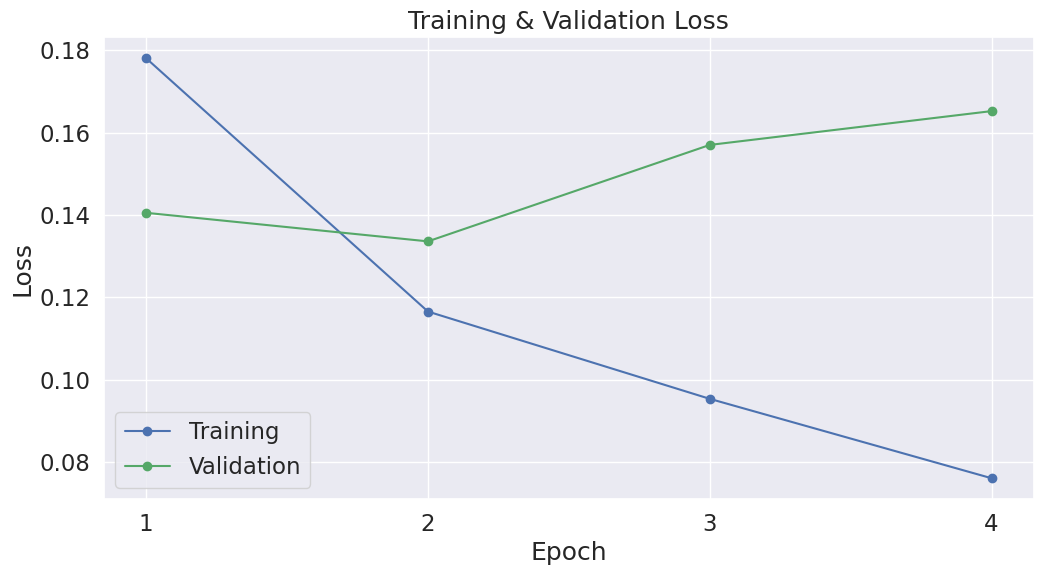

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

Parece que hay algo de ajuste excesivo aquí.

Si realmente desea obtener la mejor precisión, puede intentar guardar un checkpoint del modelo después de cada epoch y ver si el tercer punto de control funciona mejor en el conjunto de prueba.

¿Por qué pérdida de validación, no precisión?

La pérdida de validación es una medida más precisa que la precisión de la validación, porque con precisión no nos importa el valor de salida exacto, sino solo de qué lado de un umbral cae.

Si estamos prediciendo la respuesta correcta, pero con menos confianza, entonces la pérdida de validación detectará esto, mientras que la precisión no lo hará.

[[Volver]](#Contenido)

## <span style="color:#4361EE">Test</span>

Veamos cómo se comporta el modelo en el conjunto de datos Test:

In [51]:
# Create a DataLoader to batch our test samples for us. We'll use a sequential
# sampler this time--don't need this to be random!
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=batch_size)

print('Predicting labels for {:,} test sentences...'.format(len(test_dataset)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('Hecho.')

Predicting labels for 2,350 test sentences...
Hecho.


Debido a que las muestras de prueba se procesaron en lotes, se requiere un poco de reorganización para que los resultados vuelvan a ser una lista simple.

Además, las predicciones actualmente son valores de punto flotante que representan confianzas, pero debemos convertirlos en etiquetas binarias (0 o 1).

In [52]:
# Combine the results across all batches.
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

In [53]:
from sklearn.metrics import f1_score

# Calculate the F1
f1 = f1_score(flat_true_labels, flat_predictions)

print('F1 Score: {:.4f}'.format(f1))

F1 Score: 0.9709


[[Volver]](#Contenido)

## <span style="color:#4361EE">Conclusión</span>

Al simplemente convertir los features adicionales en texto parece ser una gran solución para este conjunto de datos.

Esto se debe a que las características categóricas de este conjunto de datos se pueden convertir fácilmente en texto significativo que BERT puede aprovechar.

Incluso la calificación, que técnicamente es una característica numérica, es bastante comprensible ya que solo hay 5 valores posibles.

El [Multimodal-Toolkit](https://github.com/georgian-io/Multimodal-Toolkit) también incluye otros 2 conjuntos de datos en los que este enfoque (denominado "unimodal" en sus tablas de referencia) no obtiene la puntuación más alta.

Podría imaginar cómo, si hay características de valor continuo (coma flotante) en el conjunto de datos que son muy significativas, podría ser difícil para BERT entenderlas como texto.

Entonces la solución podría estar en hacer un modelo híbrido que reciba tanto texto como los features numéricos importantes al mismo tiempo

**Ejercicio: Traducir el código anterior a Pytorch Lightning para aprovechar sus ventajas, particularmente en el uso de GPU o TPU en Google Colab o localmente.**

[[Volver]](#Contenido)